# (1) 데이터 가져오기

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt
import os
import pandas as pd


In [28]:
path = './../../../data/data/bike-sharing-demand'

os.listdir(path)

['train.csv', 'test.csv', 'sampleSubmission.csv']

In [29]:
data = pd.read_csv(path+ '/train.csv')
data

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129


# (2) datetime 컬럼을 datetime 자료형으로 변환하고 연, 월, 일, 시, 분, 초까지 6가지 컬럼 생성하기

In [30]:
data['datetime'] = pd.to_datetime(data['datetime'])

data['year'] = data['datetime'].apply(lambda x: x.year)
data['month'] = data['datetime'].apply(lambda x: x.month)
data['day'] = data['datetime'].apply(lambda x: x.day)
data['hour'] = data['datetime'].apply(lambda x: x.hour)
data['minute'] = data['datetime'].apply(lambda x: x.minute)
data['second'] = data['datetime'].apply(lambda x: x.second)

data

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,minute,second
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16,2011,1,1,0,0,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40,2011,1,1,1,0,0
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32,2011,1,1,2,0,0
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13,2011,1,1,3,0,0
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1,2011,1,1,4,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336,2012,12,19,19,0,0
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241,2012,12,19,20,0,0
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168,2012,12,19,21,0,0
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129,2012,12,19,22,0,0


In [31]:
features = ['season', 'workingday', 'weather', 'temp', 'humidity', 'windspeed' ,'month', 'hour']

<AxesSubplot:>

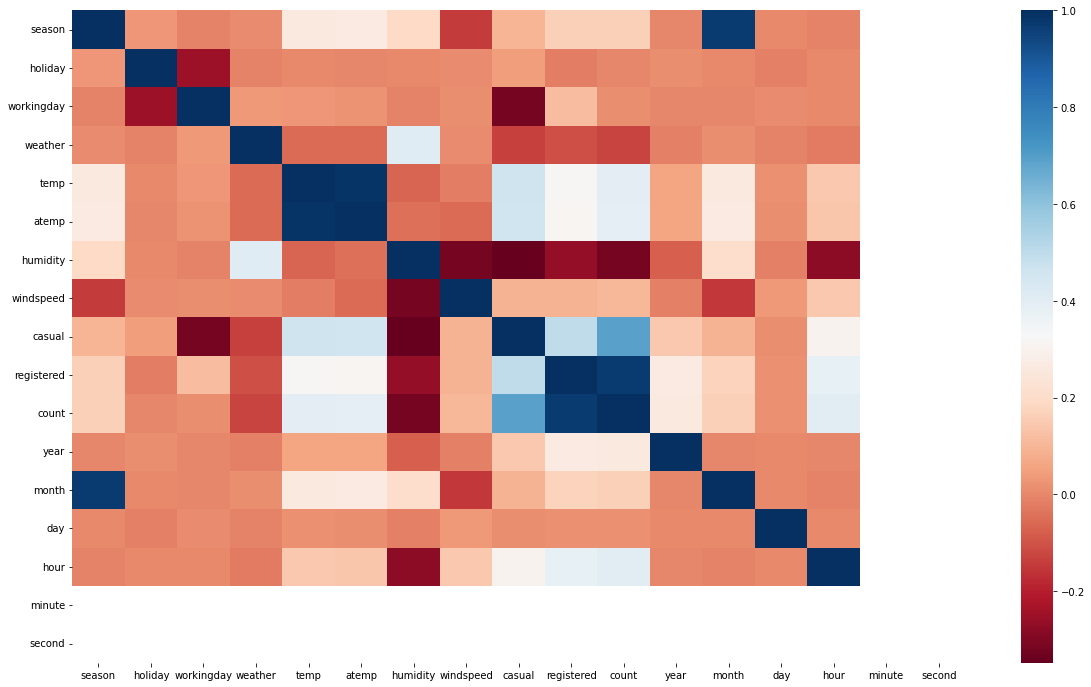

In [55]:
plt.figure(figsize=(20, 12))
sns.heatmap(data.corr(), cmap=plt.cm.RdBu)

In [33]:
data['weather'].value_counts()

1    7192
2    2834
3     859
4       1
Name: weather, dtype: int64

In [34]:
data.groupby(['year'])['count'].mean()

year
2011    144.223349
2012    238.560944
Name: count, dtype: float64

In [35]:
plot_list = ['year', 'month', 'day', 'hour', 'minute', 'second']

for a in plot_list:
    print(data.groupby([a])['count'].mean())

year
2011    144.223349
2012    238.560944
Name: count, dtype: float64
month
1      90.366516
2     110.003330
3     148.169811
4     184.160616
5     219.459430
6     242.031798
7     235.325658
8     234.118421
9     233.805281
10    227.699232
11    193.677278
12    175.614035
Name: count, dtype: float64
day
1     180.333913
2     183.910995
3     194.696335
4     195.705575
5     189.765217
6     189.860140
7     183.773519
8     179.041812
9     187.897391
10    195.183566
11    195.679577
12    190.675393
13    194.160279
14    195.829268
15    201.527875
16    191.353659
17    205.660870
18    192.605684
19    192.311847
Name: count, dtype: float64
hour
0      55.138462
1      33.859031
2      22.899554
3      11.757506
4       6.407240
5      19.767699
6      76.259341
7     213.116484
8     362.769231
9     221.780220
10    175.092308
11    210.674725
12    256.508772
13    257.787281
14    243.442982
15    254.298246
16    316.372807
17    468.765351
18    430.859649
19    31

# (3) year, month, day, hour, minute, second 데이터 개수 시각화하기

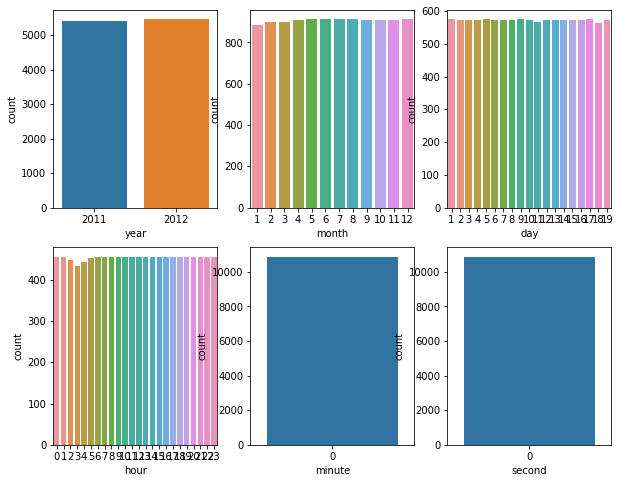

In [36]:
fig, axes = plt.subplots(2, 3, figsize=(10, 8))

axes = axes.flatten()

plot_list = ['year', 'month', 'day', 'hour', 'minute', 'second']

for i in range(len(axes)):
    sns.countplot(data=data, x=plot_list[i], ax=axes[i])

# (4) X, y 컬럼 선택 및 train/test 데이터 분리

In [37]:
data.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count',
       'year', 'month', 'day', 'hour', 'minute', 'second'],
      dtype='object')

In [38]:
X = data[features]
y = data['count']

In [39]:
from sklearn.model_selection import train_test_split

tr_X, ts_X, tr_y, ts_y = train_test_split(X, y, test_size=0.25)

# (5) LinearRegression 모델 학습

In [40]:
from sklearn.linear_model import LinearRegression

In [41]:
lr_model = LinearRegression()
lr_model.fit(tr_X, tr_y)

LinearRegression()

# (6) 학습된 모델로 X_test에 대한 예측값 출력 및 손실함수값 계산

In [42]:
pred = lr_model.predict(ts_X)

In [43]:
import numpy as np

def MSE(y, y_pred):
    mse = ((y - y_pred) ** 2).mean()  # 두 값의 차이의 제곱의 평균
    return mse

def RMSE(y, y_pred):
    rmse = np.sqrt(((y - y_pred) ** 2).mean())  # 두 값의 차이의 제곱의 평균
    return rmse

In [44]:
mse = MSE(ts_y, pred8)
rmse = RMSE(ts_y, pred)

print(f"MSE : {mse:.3f} / RMSE : {rmse:.3f}")

MSE : 21546.099 / RMSE : 146.786


# (7) x축은 temp 또는 humidity로, y축은 count로 예측 결과 시각화하기

In [45]:
ts_X

,season,workingday,weather,temp,humidity,windspeed,month,hour
6550,1,0,1,9.84,41,23.9994,3,4
2330,2,0,1,26.24,57,6.0032,6,0
6788,2,0,2,13.94,81,8.9981,4,3
5933,1,1,1,11.48,56,19.0012,2,10
9966,4,1,1,26.24,65,19.9995,10,15
...,...,...,...,...,...,...,...,...
10314,4,1,2,11.48,65,8.9981,11,4
2715,3,0,1,27.06,54,0.0000,7,1
7979,2,1,1,27.88,83,12.9980,6,20
1868,2,1,1,17.22,67,16.9979,5,18


In [50]:
ts_X.shape, pred.shape

((2722, 8), (2722,))

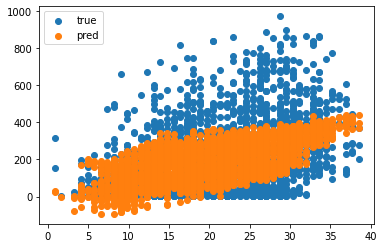

In [52]:
# x축에 X 데이터 중 temp 데이터를, y축에는 count 데이터를 넣어서 시각화하기
plt.scatter(ts_X['temp'], ts_y, label='true')
plt.scatter(ts_X['temp'], pred, label='pred')
plt.legend()

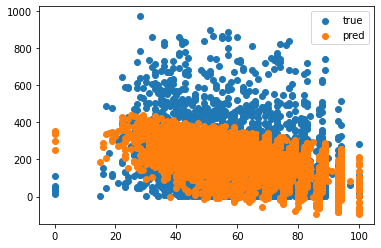

In [54]:
# x축에 X 데이터 중 humidity 데이터를, y축에는 count 데이터를 넣어서 시각화하기
plt.scatter(ts_X['humidity'], ts_y, label='true')
plt.scatter(ts_X['humidity'], pred, label='pred')
plt.legend()